# 1. Importing modules and functions

In [16]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score
import joblib
import pickle
from IPython.display import HTML
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('remove_7_KRAS_G12D_inhibitors_update202209_updated 8.44.28 PM.csv', sep=';')
df

,id,SMILES,KRAS G12D SPR KD (nM),KRAS G12D binding IC50 (nM),pERK IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,97.7,124.7,3159.1
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.4,2.7,721.4
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,8.3,9.5,10283.1
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,155.7,496.2,8530
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,294.8,722.9,8193.8
...,...,...,...,...,...
633,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,NaN,331.2,>16667
634,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,NaN,2.7,559
635,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,NaN,9.7,1311
636,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,NaN,2485.2,NaN


In [20]:
df.columns

Index(['id', 'SMILES', 'KRAS G12D SPR KD  (nM)', 'KRAS G12D binding IC50 (nM)',
       'pERK IC50 (nM)'],
      dtype='object')

In [22]:
df.drop(['KRAS G12D SPR KD  (nM)','pERK IC50 (nM)'], axis=1,inplace=True)
df

,id,SMILES,KRAS G12D binding IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9
...,...,...,...
633,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2
634,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7
635,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7
636,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2


# Data curation

In [24]:
df.dropna(subset=['KRAS G12D binding IC50 (nM)'], inplace=True)
df

,id,SMILES,KRAS G12D binding IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9
...,...,...,...
633,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2
634,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7
635,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7
636,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2


In [26]:
mask = df['KRAS G12D binding IC50 (nM)'].str.contains(r'[<>=]', regex=True, na=False)
filtered_df = df[mask]
filtered_df

,id,SMILES,KRAS G12D binding IC50 (nM)
38,39,COCCN(CC1)CCC1Oc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc...,>10000
311,316,Cc1cccc(F)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)nc2OC...,>10000
312,317,Cc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC)c3F)...,>10000
313,318,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c(CCC4...,>10000
314,319,CCOC(CCCOc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)c...,>10000
315,320,Oc1c(C=O)cc(CCCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c...,>10000
475,480,C#CC1=CC=CC2=C1C(C1=CC=C3C(N4CC5CCC(C4)N5)=NC(...,>100
505,510,C#CC1=CC=CC2=CC(O)=C[C@]([C@]3=C(C=C4C(N5CC6CC...,>100
581,587,CN1CCC[C@H]1COC1=NC2=C(CCN(C3CC(O)C4=CC=CC=C43...,>10000
582,588,COC1C=C(N2CCC3=C(C2)N=C(OC[C@@H]2CCCN2C)N=C3N2...,>10000


In [28]:
mask = df['KRAS G12D binding IC50 (nM)'].str.contains(r'[<>=]', regex=True, na=False)
clean_df = df[~mask]
clean_df

,id,SMILES,KRAS G12D binding IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9
...,...,...,...
633,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2
634,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7
635,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7
636,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2


# Creation sdf

In [32]:
PandasTools.AddMoleculeColumnToFrame(clean_df, 'SMILES', 'Molecule')
HTML(clean_df.head().to_html())

C:\Users\ovtti\anaconda3\Lib\site-packages\rdkit\Chem\PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,id,SMILES,KRAS G12D binding IC50 (nM),Molecule
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3CC(CC4)NC4C3)n2)CCC1,124.7,<rdkit.Chem.rdchem.Mol object at 0x000001CD68735FC0>
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4ccccc34)c3F)c3n2)CCC1,2.7,<rdkit.Chem.rdchem.Mol object at 0x000001CD68736A40>
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4ccccc34)c3F)c3n2)ncc1,9.5,<rdkit.Chem.rdchem.Mol object at 0x000001CD68736AB0>
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3OCCc3ncccc3)c2F)c1,496.2,<rdkit.Chem.rdchem.Mol object at 0x000001CD68736B20>
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc3ccccc23)c2F)c2n1,722.9,<rdkit.Chem.rdchem.Mol object at 0x000001CD68736B90>


In [40]:
def convert_smi_to_canon_smi(smi):
    canon_smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi),isomericSmiles = False)
    return canon_smi

In [42]:
clean_df["canonical_smiles"] = clean_df.apply(lambda x: convert_smi_to_canon_smi(x.SMILES), axis=1)
clean_df.head()

C:\Users\ovtti\AppData\Local\Temp\ipykernel_3004\422818825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["canonical_smiles"] = clean_df.apply(lambda x: convert_smi_to_canon_smi(x.SMILES), axis=1)


,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...


In [44]:
clean_df['KRAS G12D binding IC50 (nM)'] = pd.to_numeric(clean_df['KRAS G12D binding IC50 (nM)'], downcast="float")

C:\Users\ovtti\AppData\Local\Temp\ipykernel_3004\1088731853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['KRAS G12D binding IC50 (nM)'] = pd.to_numeric(clean_df['KRAS G12D binding IC50 (nM)'], downcast="float")


C:\Users\ovtti\AppData\Local\Temp\ipykernel_3004\1208576134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['pIC50'] = -np.log10(clean_df['KRAS G12D binding IC50 (nM)'] * 1e-9)


,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922
...,...,...,...,...,...,...
633,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.200012,,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,6.479910
634,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636
635,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228
636,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639

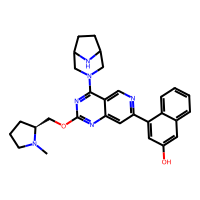
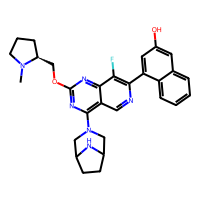
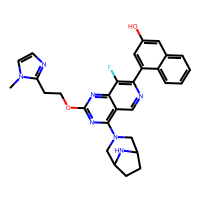
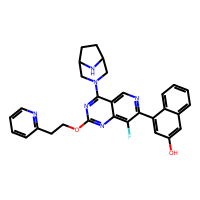
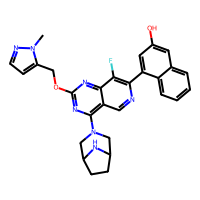
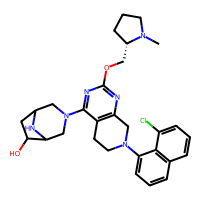
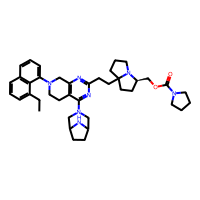
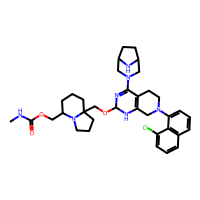
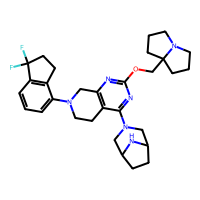
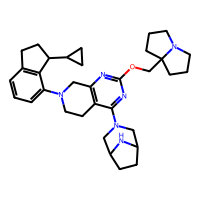

In [46]:
clean_df['pIC50'] = -np.log10(clean_df['KRAS G12D binding IC50 (nM)'] * 1e-9)
clean_df

In [48]:
duplicates = clean_df[clean_df['canonical_smiles'].duplicated(keep=False)]
duplicates

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50
33,34,CN(C1)[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4c...,135.399994,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,COC1CC(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5ccc...,6.868382
54,55,OC[C@@H](COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl...,6131.299805,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,OCC(O)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.212448
55,56,OC[C@H](COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)...,5916.700195,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,OCC(O)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.227921
130,134,F[C@H]1CN(CCC2)[C@]2(COc2nc(N3CC(CC4)NC4C3)c(c...,3.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,8.431798
132,136,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)N...,5150.600098,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.288142
133,137,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)N...,2633.399902,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.579483
145,149,CN(C1)[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4c...,869.500000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,COC1CC(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5ccc...,6.060730
212,216,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,0.900000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CC(...,9.045757
215,219,CO[C@H]1CN(CCC2)[C@]2(COc2nc(N3CC(CC4)NC4C3)c(...,8.100000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,COC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cc...,8.091515
219,223,O[C@H]1CN(CCC2)[C@]2(COc2nc(N3CC(CC4)NC4C3)c(c...,7.100000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,OC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4ccc...,8.148742


In [50]:
mean_std = clean_df.groupby(['canonical_smiles'], as_index=False).agg({'pIC50':['mean','std']})
mean_std

canonical_smiles     pIC50    
                                                            mean std
0    *C1CC2CN(c3nc(OCC4CCCN4C)nc4c3CCN(c3cc(O)cc5cc...  7.055024 NaN
1    *C1CN2CCCC2(COc2nc3c(c(N4CC5CCC(C4)N5)n2)CCN(c...  8.508638 NaN
2    C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...  8.795880 NaN
3    C#Cc1c(F)ccc2cc(O)cc(-c3c(C#N)cc4c(N5CC6CCC(C5...  8.982966 NaN
4    C#Cc1c(F)ccc2cc(O)cc(-c3c(C(C)C)cc4c(N5CC6CC(C...  8.939302 NaN
..                                                 ...       ...  ..
575  Oc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56C...  6.300769 NaN
576  Oc1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34CCCN3...  5.486569 NaN
577  [H]C#Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...  9.154902 NaN
578  c1cc2c(c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5CCC...  6.184356 NaN
579  c1ccc2c(-c3cc4nc(OCC56CCCN5CCC6)nc(N5CC6CCC(C5...  6.412065 NaN

[580 rows x 3 columns]

In [52]:
# Fix the column names while preserving 'canonical_smiles'
new_columns = []
for col in mean_std.columns:
    if isinstance(col, tuple):
        if col[0] == 'canonical_smiles':
            new_columns.append('canonical_smiles')  # Keep the original name
        else:
            new_columns.append(f'{col[0]}_{col[1]}')
    else:
        new_columns.append(col)

mean_std.columns = new_columns

In [54]:
mean_std.sort_values(by='pIC50_std')

,canonical_smiles,pIC50_mean,pIC50_std
106,CC1CC1c1c(Cl)cc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)n...,9.000000,0.000000
502,OCC(O)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.220184,0.010941
265,COC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cc...,8.063864,0.039105
186,CN1CCC(Oc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5cccc...,5.744564,0.058493
535,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CC(...,9.227966,0.103328
...,...,...,...
575,Oc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56C...,6.300769,NaN
576,Oc1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34CCCN3...,5.486569,NaN
577,[H]C#Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...,9.154902,NaN
578,c1cc2c(c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5CCC...,6.184356,NaN


In [56]:
# Маска: True для строк, где ВСЕ значения не NaN
mask = mean_std.notna().all(axis=1)

# Отображаем только "чистые" строки
clean_rows = mean_std[mask]
clean_rows

,canonical_smiles,pIC50_mean,pIC50_std
30,C#Cc1cccc2cc(O)cc(-c3c(F)cc4c(N5CC6CCC(C5)N6)n...,8.299300,0.535253
106,CC1CC1c1c(Cl)cc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)n...,9.000000,0.000000
107,CC1CC1c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34...,6.897694,0.667472
122,CCCC1CC2CN(c3nc(OCC4CCCN4C)nc4c3CCN(c3cccc5ccc...,6.774510,0.468351
157,CCc1cccc2cncc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56...,7.421245,0.806322
183,CN1CCC(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5ccc...,6.709004,0.495652
186,CN1CCC(Oc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5cccc...,5.744564,0.058493
229,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,7.908978,0.739379
230,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,6.887879,0.576956
261,COC1CC(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5ccc...,6.464556,0.571096


In [58]:
len(clean_rows)

20

In [82]:
df_rem_dub = clean_df.merge(mean_std, on=['canonical_smiles'])
df_rem_dub

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,6.904134,NaN
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636,8.568636,NaN
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276,8.022276,NaN
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343,6.304343,NaN
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922,6.140922,NaN
...,...,...,...,...,...,...,...,...
598,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.200012,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,6.479910,6.887879,0.576956
599,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636,8.568636,NaN
600,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228,8.013228,NaN
601,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639,5.604639,NaN


In [84]:
df_rem_dub['pIC50_std'] = df_rem_dub['pIC50_std']. fillna (0)

In [86]:
df_rem_dub = df_rem_dub.drop_duplicates(subset='canonical_smiles', keep='first')
df_rem_dub

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,6.904134,0.000000
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636,8.568636,0.000000
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276,8.022276,0.000000
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343,6.304343,0.000000
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922,6.140922,0.000000
...,...,...,...,...,...,...,...,...
597,643,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,50.599998,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,7.295849,6.887879,0.576956
599,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636,8.568636,0.000000
600,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228,8.013228,0.000000
601,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639,5.604639,0.000000


In [88]:
def remove_salt(smi):
    if '.' in smi:
        smi='SALT_MIX'
    
    return smi

In [90]:
df_rem_dub["canonical_smiles"] = df_rem_dub.apply(lambda x: remove_salt(x.canonical_smiles), axis=1)

C:\Users\ovtti\AppData\Local\Temp\ipykernel_3004\123633060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rem_dub["canonical_smiles"] = df_rem_dub.apply(lambda x: remove_salt(x.canonical_smiles), axis=1)


In [92]:
df_rem_dub[(df_rem_dub[('canonical_smiles')] == 'SALT_MIX')]

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
106,118,OC(C(F)(F)F)=O.Oc1cc2ccccc2c(-c(ncc2c(N3CC(CC4...,476.600006,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,SALT_MIX,6.321846,6.321846,0.0
107,119,OC(C(F)(F)F)=O.Oc1cc2ccccc2c(-c(ncc2c(N3CC(CC4...,684.299988,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,SALT_MIX,6.164753,6.164753,0.0
109,121,OC[C@H](CC1)N1c1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(...,204.199997,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,SALT_MIX,6.689944,6.689944,0.0
168,182,Nc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc3ccccc23)...,269.100006,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,SALT_MIX,6.570086,6.570086,0.0


In [94]:
df6 = df_rem_dub[(df_rem_dub[('canonical_smiles')] != 'SALT_MIX')]

In [96]:
df6

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,6.904134,0.000000
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636,8.568636,0.000000
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276,8.022276,0.000000
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343,6.304343,0.000000
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922,6.140922,0.000000
...,...,...,...,...,...,...,...,...
597,643,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,50.599998,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,7.295849,6.887879,0.576956
599,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636,8.568636,0.000000
600,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228,8.013228,0.000000
601,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639,5.604639,0.000000


In [98]:
df6.sort_values(by='pIC50_std')

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,6.904134,0.000000
412,435,CNC(O[C@@H]1CN(CCC2)[C@@]2(COc2nc(N3CC(CC4)NC4...,28.200001,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CNC(=O)OC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc...,7.549751,7.549751,0.000000
411,434,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,0.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OC...,9.154902,9.154902,0.000000
410,433,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,0.900000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OC...,9.045757,9.045757,0.000000
409,432,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,1.900000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56...,8.721247,8.721247,0.000000
...,...,...,...,...,...,...,...,...
121,134,F[C@H]1CN(CCC2)[C@]2(COc2nc(N3CC(CC4)NC4C3)c(c...,3.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,8.431798,8.009249,0.597574
268,285,C[C@H](C1)[C@H]1c(cccc1)c1-c(ncc(c1n2)c(N3CC(C...,279.000000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CC1CC1c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34...,6.554396,6.897694,0.667472
530,556,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC(O)=CC4=C3C=CC...,3.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,8.431798,7.908978,0.739379
234,251,Oc1cc(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3OC[C@](C...,0.200000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CC(...,9.698970,9.150515,0.775632


In [100]:
#keep only SD less thab 0.5 SD
df6 = df6[(df6['pIC50_std'] < 0.5)]
df6

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,6.904134,0.0
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636,8.568636,0.0
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276,8.022276,0.0
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343,6.304343,0.0
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922,6.140922,0.0
...,...,...,...,...,...,...,...,...
595,641,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,5489.700195,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CN1CCCC1COc1nc2c(c(N3CC4CC(C#N)C(C3)N4)n1)CCN(...,5.260451,5.260451,0.0
599,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636,8.568636,0.0
600,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228,8.013228,0.0
601,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,<rdkit.Chem.rdchem.Mol object at 0x000001CD687...,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639,5.604639,0.0


# Create work and test sets

In [210]:
df6=df6.sort_values(by='pIC50_mean')
df6.head(15)

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
602,142,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)N...,8846.400391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.053234,5.053234,0.0
601,83,O=C1N(CCC2)C2(COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c...,8694.900391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,O=C1CCC2(COc3nc(N4CC5CCC(C4)N5)c4cnc(-c5cccc6c...,5.060735,5.060735,0.0
600,62,Oc1c(C=O)cc(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4...,8407.400391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,O=Cc1cc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.075338,5.075338,0.0
599,261,NCCOc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)cccc3c...,8304.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc(Cl)...,5.080702,5.080702,0.0
598,101,Cc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OCCc4cn...,8081.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCCc5c...,5.092503,5.092503,0.0
597,138,C[C@H](COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)c...,8067.799805,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,COC(C)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.093245,5.093245,0.0
596,402,CC(C)(c(cccc1)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)n...,8017.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,CC(C)(O)c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC...,5.095956,5.095956,0.0
595,86,COc1ncc(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4c(Cl...,7919.899902,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,COc1ccc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.101280,5.101280,0.0
594,567,CN1CCC[C@H]1COC1=NC(N2CC3CCC(C2)N3)=C2CCN(C3=C...,7904.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1ccc...,5.102120,5.102120,0.0
593,574,COC1=NC2=C(CCN(C3=CC=CC4=C3C(C)=CC=C4)C2)C(N2C...,7862.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1cccc3cccc(C...,5.104434,5.104434,0.0


In [214]:
data_test=df6.loc[::5]
data_test.head(5)

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
602,142,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)N...,8846.400391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.053234,5.053234,0.0
597,138,C[C@H](COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)c...,8067.799805,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,COC(C)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.093245,5.093245,0.0
592,421,CC(C)c(nccc1)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)nc...,7746.700195,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,CC(C)c1ncccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34C...,5.110883,5.110883,0.0
587,577,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=C(F)C(O)=C(F)C4=...,6788.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1c(F...,5.168245,5.168245,0.0
581,147,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)N...,5876.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.230904,5.230904,0.0


In [218]:
data_work=df6.drop(df6.loc[::5].index)
data_work.head(25)

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
601,83,O=C1N(CCC2)C2(COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c...,8694.900391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,O=C1CCC2(COc3nc(N4CC5CCC(C4)N5)c4cnc(-c5cccc6c...,5.060735,5.060735,0.000000
600,62,Oc1c(C=O)cc(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4...,8407.400391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,O=Cc1cc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.075338,5.075338,0.000000
599,261,NCCOc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)cccc3c...,8304.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc(Cl)...,5.080702,5.080702,0.000000
598,101,Cc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OCCc4cn...,8081.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCCc5c...,5.092503,5.092503,0.000000
596,402,CC(C)(c(cccc1)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)n...,8017.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,CC(C)(O)c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC...,5.095956,5.095956,0.000000
595,86,COc1ncc(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4c(Cl...,7919.899902,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,COc1ccc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.101280,5.101280,0.000000
594,567,CN1CCC[C@H]1COC1=NC(N2CC3CCC(C2)N3)=C2CCN(C3=C...,7904.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1ccc...,5.102120,5.102120,0.000000
593,574,COC1=NC2=C(CCN(C3=CC=CC4=C3C(C)=CC=C4)C2)C(N2C...,7862.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1cccc3cccc(C...,5.104434,5.104434,0.000000
591,213,Oc1cc2ccccc2c(-c2ncc3c(N4CC(CC5)NC5C4)nc(OCCNC...,7529.000000,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,O=C(NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc4c...,5.123263,5.123263,0.000000
590,610,NC1=NC2=C(C=CC=C2)C(N2CCC3=C(C2)N=C(OCC2CCCN2)...,7500.000000,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D...,Nc1nc(N2CCc3c(nc(OCC4CCCN4)nc3N3CC4CCC(C3)N4)C...,5.124939,5.124939,0.000000


# Creating sdf files

Creating test set

In [222]:
PandasTools.AddMoleculeColumnToFrame(data_test, 'canonical_smiles', 'Molecule')
HTML(data_test.head().to_html())

C:\Users\ovtti\anaconda3\Lib\site-packages\rdkit\Chem\PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
602,142,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)NC3C1)nc2OC(CC1)Cc2c1[nH]nc2,8846.400391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF8D725E0>,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)nc(OC3CCc4[nH]ncc4C3)nc12,5.053234,5.053234,0.0
597,138,C[C@H](COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)cccc3ccc2)c2F)c2n1)OC,8067.799805,<rdkit.Chem.rdchem.Mol object at 0x0000022FFD4DCDD0>,COC(C)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc(Cl)c34)c(F)c2n1,5.093245,5.093245,0.0
592,421,CC(C)c(nccc1)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)nc2OC[C@](CCC2)(C3)N2C[C@@H]3F)c1F,7746.700195,<rdkit.Chem.rdchem.Mol object at 0x0000022FFD4DEDC0>,CC(C)c1ncccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34CCCN3CC(F)C4)nc2c1F,5.110883,5.110883,0.0
587,577,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=C(F)C(O)=C(F)C4=C3C=CC=C4)C2)C(N2CC3CCC(C2)N3)=N1,6788.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FFD4DCAC0>,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1c(F)c(O)c(F)c3ccccc13)C2,5.168245,5.168245,0.0
581,147,Fc(c1n2)c(-c3c4c(Cl)cccc4ccc3)ncc1c(N1CC(CC3)NC3C1)nc2OCCn1nccc1,5876.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FFD4DF760>,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)nc(OCCn3cccn3)nc12,5.230904,5.230904,0.0


In [226]:
PandasTools.WriteSDF(data_test, 'KRAS_test_from_insilico.sdf', molColName='Molecule', properties=list(df6.columns))

Creating work set

In [231]:
PandasTools.AddMoleculeColumnToFrame(data_work, 'canonical_smiles', 'Molecule')
HTML(data_work.head().to_html())

,id,SMILES,KRAS G12D binding IC50 (nM),Molecule,canonical_smiles,pIC50,pIC50_mean,pIC50_std
601,83,O=C1N(CCC2)C2(COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4c(Cl)cccc4ccc3)c3F)c3n2)CC1,8694.900391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF6916340>,O=C1CCC2(COc3nc(N4CC5CCC(C4)N5)c4cnc(-c5cccc6cccc(Cl)c56)c(F)c4n3)CCCN12,5.060735,5.060735,0.0
600,62,Oc1c(C=O)cc(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c4c(Cl)cccc4ccc3)c3F)c3n2)cc1,8407.400391,<rdkit.Chem.rdchem.Mol object at 0x0000022FF6917300>,O=Cc1cc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5cccc(Cl)c45)c(F)c3n2)ccc1O,5.075338,5.075338,0.0
599,261,NCCOc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)cccc3ccc2)c2F)c2n1,8304.200195,<rdkit.Chem.rdchem.Mol object at 0x0000022FF6916CE0>,NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc(Cl)c34)c(F)c2n1,5.080702,5.080702,0.0
598,101,Cc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OCCc4cnccc4)c3F)cccc2ccc1,8081.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF69167A0>,Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCCc5cccnc5)nc4c3F)c12,5.092503,5.092503,0.0
596,402,CC(C)(c(cccc1)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)nc2OC[C@](CCC2)(C3)N2C[C@@H]3F)c1F)O,8017.600098,<rdkit.Chem.rdchem.Mol object at 0x0000022FF6916810>,CC(C)(O)c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34CCCN3CC(F)C4)nc2c1F,5.095956,5.095956,0.0


In [233]:
PandasTools.WriteSDF(data_work, 'KRAS_work_from_insilico.sdf', molColName='Molecule', properties=list(df6.columns))